<a href="https://colab.research.google.com/github/Hoangthang017/CS114.K21/blob/master/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
# Lấy dữ liệu từ file scv 

url = "https://d396qusza40orc.cloudfront.net/phoenixassets/home_data.csv"

dataFrame = pd.read_csv(url)

In [80]:
# Bài 1 :
'''
Price_Zipcode = dataFrame[(dataFrame['zipcode'] == 98039)][['zipcode','price']].values

Sum = sum(Price_Zipcode[:,1:None])
Len = len(Price_Zipcode[:,1:None])
average = Sum / Len

print(average)

'''

"\nPrice_Zipcode = dataFrame[(dataFrame['zipcode'] == 98039)][['zipcode','price']].values\n\nSum = sum(Price_Zipcode[:,1:None])\nLen = len(Price_Zipcode[:,1:None])\naverage = Sum / Len\n\nprint(average)\n\n"

In [81]:
# Bài 2 :
'''
features = ['sqft_living']
target = ['price']

dataFrame = dataFrame[(dataFrame['sqft_living'] > 2000) & (dataFrame['sqft_living'] < 4000)][['sqft_living','price']].values
'''

"\nfeatures = ['sqft_living']\ntarget = ['price']\n\ndataFrame = dataFrame[(dataFrame['sqft_living'] > 2000) & (dataFrame['sqft_living'] < 4000)][['sqft_living','price']].values\n"

In [0]:
# Bài 3 : 

features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]
target = ['price']

dataFrame = dataFrame[features+target].values  


In [0]:
# Xử lí dữ liệu

X = dataFrame[:,None:len(features)]
Y = dataFrame[:,len(features):None]

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.1,random_state = 1)

In [84]:
# train và đánh giá cho model
my_model = LinearRegression()
my_model.fit(X_train,Y_train)
result = my_model.predict(X_test)

print("Coefficients: ", my_model.coef_)
print("Mean squared error : %.2f" % mean_squared_error(Y_test,result))
print("Coefficient of determination: %.2f" % r2_score(Y_test,result))

Coefficients:  [[-3.45084885e+04  4.32993258e+04  1.09011351e+02  9.74100306e-02
   6.28094827e+03 -5.67349049e+02  2.68846436e+04  9.58422539e+04
   5.43371841e+05  5.38802063e+04  7.11327580e+01  3.78785928e+01
  -2.61761262e+03  1.96453502e+01  6.03759812e+05 -2.10480561e+05
   1.87213895e+01 -3.53351057e-01]]
Mean squared error : 51189089378.14
Coefficient of determination: 0.68


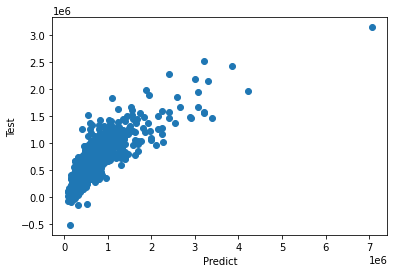

In [85]:
# Đồ thị kết quả 

plt.scatter(Y_test,result)

plt.xlabel("Predict")
plt.ylabel("Test")

plt.show()